## Time Series EDA

In [19]:
## Install Pandas Data Reader
!pip install yfinance

Defaulting to user installation because normal site-packages is not writeable


In [20]:
import yfinance as yf
import pandas as pd
from datetime import datetime

In [41]:
company = 'TATAELXSI.NS'

# Read Stock Price Data 
df_tesla = yf.download(company)

[*********************100%%**********************]  1 of 1 completed


In [42]:
df_tesla.tail()

Open         High          Low        Close    Adj Close  \
Date                                                                          
2024-03-11  7724.899902  7748.000000  7633.149902  7702.950195  7702.950195   
2024-03-12  7706.000000  7838.799805  7515.000000  7573.899902  7573.899902   
2024-03-13  7650.000000  7837.649902  7335.000000  7392.799805  7392.799805   
2024-03-14  7456.750000  7772.250000  7351.950195  7730.600098  7730.600098   
2024-03-15  7744.000000  7825.000000  7600.000000  7707.000000  7707.000000   

            Volume  
Date                
2024-03-11  132700  
2024-03-12  112485  
2024-03-13  314712  
2024-03-14  134183  
2024-03-15  166240

<Axes: xlabel='Date'>

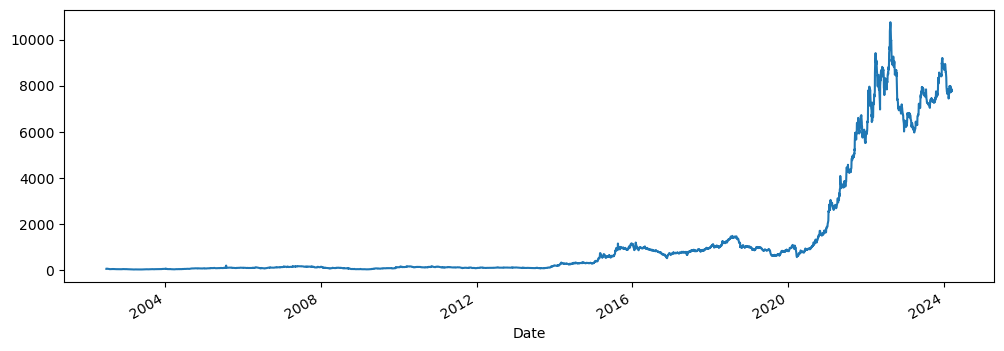

In [43]:
df_tesla['High'].plot(figsize=(12,4))

<Axes: xlabel='Date'>

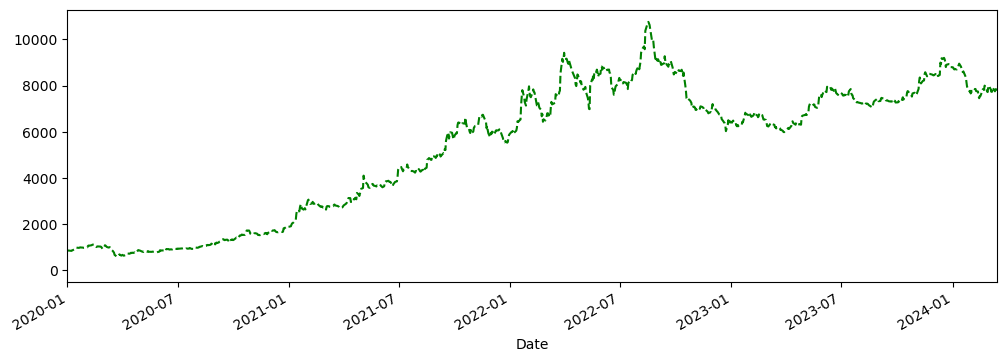

In [44]:
## xlimit and y limit
df_tesla['High'].plot(xlim=['2020-01-01','2024-03-15'],figsize=(12,4),ls='--',c='green')

In [45]:
df_tesla.index

DatetimeIndex(['2002-07-01', '2002-07-02', '2002-07-03', '2002-07-04',
               '2002-07-05', '2002-07-08', '2002-07-09', '2002-07-10',
               '2002-07-11', '2002-07-12',
               ...
               '2024-03-01', '2024-03-04', '2024-03-05', '2024-03-06',
               '2024-03-07', '2024-03-11', '2024-03-12', '2024-03-13',
               '2024-03-14', '2024-03-15'],
              dtype='datetime64[ns]', name='Date', length=5392, freq=None)

In [46]:
index=df_tesla.loc['2020-01-01':'2024-03-15'].index
share_open=df_tesla.loc['2020-01-01':'2024-03-15']['Open']

In [47]:
share_open

Date
2020-01-01     827.900024
2020-01-02     829.799988
2020-01-03     828.000000
2020-01-06     835.000000
2020-01-07     830.000000
                 ...     
2024-03-11    7724.899902
2024-03-12    7706.000000
2024-03-13    7650.000000
2024-03-14    7456.750000
2024-03-15    7744.000000
Name: Open, Length: 1044, dtype: float64

In [48]:
index

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-06',
               '2020-01-07', '2020-01-08', '2020-01-09', '2020-01-10',
               '2020-01-13', '2020-01-14',
               ...
               '2024-03-01', '2024-03-04', '2024-03-05', '2024-03-06',
               '2024-03-07', '2024-03-11', '2024-03-12', '2024-03-13',
               '2024-03-14', '2024-03-15'],
              dtype='datetime64[ns]', name='Date', length=1044, freq=None)

In [49]:
import matplotlib.pyplot as plt
%matplotlib inline

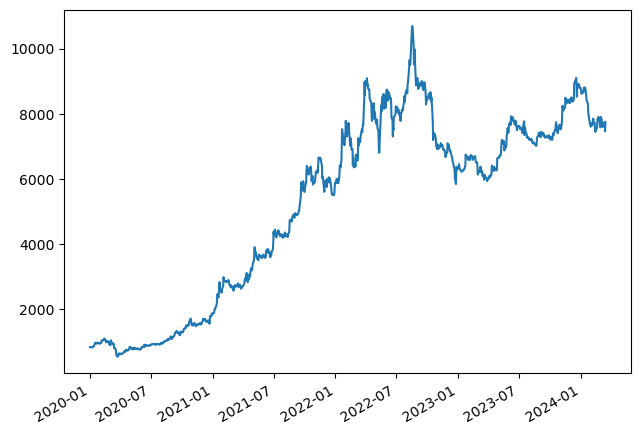

In [50]:
figure,axis=plt.subplots()
plt.tight_layout()
## Preventing overlapping
figure.autofmt_xdate()
axis.plot(index,share_open)

In [51]:
## Datetime Index

In [52]:
df_tesla=df_tesla.reset_index()

In [53]:
df_tesla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5392 entries, 0 to 5391
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       5392 non-null   datetime64[ns]
 1   Open       5392 non-null   float64       
 2   High       5392 non-null   float64       
 3   Low        5392 non-null   float64       
 4   Close      5392 non-null   float64       
 5   Adj Close  5392 non-null   float64       
 6   Volume     5392 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 295.0 KB


In [54]:
df_tesla = df_tesla.set_index('Date',drop=True)

In [55]:
df_tesla.head()

Open       High        Low      Close  Adj Close   Volume
Date                                                                      
2002-07-01  57.974998  58.000000  56.775002  57.400002  36.968140   471000
2002-07-02  57.000000  57.450001  55.750000  56.500000  36.388496   342572
2002-07-03  56.450001  62.325001  56.450001  61.750000  39.769737  3909024
2002-07-04  62.400002  65.224998  60.849998  63.150002  40.671394  4254082
2002-07-05  63.450001  68.000000  62.775002  67.224998  43.295868  5105978

In [58]:
## datetime
from datetime import datetime

In [60]:
datetime(2024,2,10)

datetime.datetime(2024, 2, 10, 0, 0)

In [61]:
datetime.now()

datetime.datetime(2024, 3, 16, 18, 44, 58, 413724)

In [62]:
date=datetime(2024,2,10)

In [63]:
date

datetime.datetime(2024, 2, 10, 0, 0)

In [64]:
date.date()

datetime.date(2024, 2, 10)

In [65]:
date.day

10

In [66]:
date.weekday()

5

In [67]:
date.year

2024

In [68]:
date.month

2

## Time Resampling

In [71]:
df_tesla.head()

Open       High        Low      Close  Adj Close   Volume
Date                                                                      
2002-07-01  57.974998  58.000000  56.775002  57.400002  36.968140   471000
2002-07-02  57.000000  57.450001  55.750000  56.500000  36.388496   342572
2002-07-03  56.450001  62.325001  56.450001  61.750000  39.769737  3909024
2002-07-04  62.400002  65.224998  60.849998  63.150002  40.671394  4254082
2002-07-05  63.450001  68.000000  62.775002  67.224998  43.295868  5105978

In [72]:
df_tesla.resample(rule='A').min()
# minimum share price during year

Open         High          Low        Close    Adj Close  \
Date                                                                          
2002-12-31    41.674999    42.000000    39.599998    41.125000    26.486322   
2003-12-31    32.549999    32.900002    30.575001    32.474998    20.915333   
2004-12-31    36.599998    37.250000    35.000000    36.924999    23.781338   
2005-12-31    73.000000    74.125000    70.550003    72.525002    48.381981   
2006-12-31    74.925003    75.125000    73.250000    74.474998    51.939598   
2007-12-31   116.000000   120.750000   115.625000   117.449997    85.393410   
2008-12-31    43.525002    44.049999    41.224998    43.599998    32.809395   
2009-12-31    37.599998    38.775002    37.549999    38.275002    28.802284   
2010-12-31   114.900002   117.449997   113.099998   113.724998    93.787003   
2011-12-31    85.175003    86.625000    82.550003    85.500000    72.445160   
2012-12-31    86.775002    89.925003    86.400002    86.925003    73.652588   
2013-12-31    83.000000    83.500000    78.275002    82.525002    73.870300   
2014-12-31   179.500000   188.149994   173.500000   181.774994   162.711578   
2015-12-31   298.500000   307.450012   298.000000   301.875000   274.345581   
2016-12-31   519.500000   523.025024   510.625000   515.599976   480.921844   
2017-12-31   656.250000   667.474976   641.174988   656.000000   611.878906   
2018-12-31   930.000000   970.000000   922.000000   955.349976   906.502319   
2019-12-31   602.799988   618.299988   592.250000   604.500000   582.427612   
2020-12-31   540.000000   569.000000   499.950012   544.400024   524.522156   
2021-12-31  1843.000000  1875.000000  1837.000000  1867.949951  1832.305664   
2022-12-31  5840.000000  5901.750000  5709.049805  5799.549805  5725.277832   
2023-12-31  5929.000000  5976.000000  5882.549805  5926.149902  5880.053711   
2024-12-31  7440.000000  7449.899902  7335.000000  7392.799805  7392.799805   

            Volume  
Date                
2002-12-31       0  
2003-12-31       0  
2004-12-31       0  
2005-12-31       0  
2006-12-31   25122  
2007-12-31   11296  
2008-12-31       0  
2009-12-31       0  
2010-12-31   59748  
2011-12-31   20454  
2012-12-31   11412  
2013-12-31   11604  
2014-12-31       0  
2015-12-31  312168  
2016-12-31  187152  
2017-12-31   95246  
2018-12-31   58492  
2019-12-31  187554  
2020-12-31   63716  
2021-12-31   40009  
2022-12-31   66855  
2023-12-31   35750  
2024-12-31   34849

In [73]:
df_tesla.resample(rule='A').max()

Open          High           Low         Close  \
Date                                                                 
2002-12-31     68.275002     70.250000     66.000000     67.224998   
2003-12-31     64.000000     64.650002     62.250000     63.474998   
2004-12-31     84.500000     85.000000     81.050003     83.275002   
2005-12-31    201.800003    201.800003    201.800003    201.800003   
2006-12-31    138.475006    138.500000    135.024994    136.149994   
2007-12-31    180.000000    182.399994    171.500000    180.425003   
2008-12-31    152.000000    155.500000    147.000000    149.475006   
2009-12-31    131.449997    134.250000    128.500000    131.050003   
2010-12-31    171.000000    173.699997    164.350006    168.300003   
2011-12-31    159.000000    162.000000    155.550003    158.274994   
2012-12-31    121.974998    126.849998    120.500000    122.425003   
2013-12-31    208.149994    213.899994    205.250000    208.524994   
2014-12-31    336.424988    349.899994    330.000000    335.575012   
2015-12-31   1147.000000   1164.949951   1135.025024   1141.675049   
2016-12-31   1126.000000   1201.500000   1121.000000   1149.300049   
2017-12-31    973.549988    984.849976    960.700012    977.150024   
2018-12-31   1454.849976   1490.900024   1439.199951   1465.449951   
2019-12-31   1030.000000   1042.000000   1025.000000   1029.699951   
2020-12-31   1867.000000   1888.000000   1839.500000   1855.099976   
2021-12-31   6651.149902   6730.000000   6580.299805   6619.299805   
2022-12-31  10688.000000  10760.000000  10563.000000  10684.900391   
2023-12-31   9099.000000   9200.000000   9001.250000   9087.349609   
2024-12-31   8800.000000   8949.000000   8712.150391   8755.450195   

               Adj Close    Volume  
Date                                
2002-12-31     43.295868   5105978  
2003-12-31     40.880711   4714664  
2004-12-31     55.553391   9605598  
2005-12-31    138.368439   3883330  
2006-12-31     96.969292   1312916  
2007-12-31    128.502991   1106514  
2008-12-31    108.677551    432914  
2009-12-31    102.733894  14593140  
2010-12-31    133.330536   7966656  
2011-12-31    130.526581   2048080  
2012-12-31    106.836578   1504354  
2013-12-31    186.656204  11979226  
2014-12-31    304.972290  14118578  
2015-12-31   1056.006104   9837934  
2016-12-31   1063.058960   4966954  
2017-12-31    920.054504   5856284  
2018-12-31   1390.520508   5190627  
2019-12-31    977.050659   9825204  
2020-12-31   1819.700806   4036332  
2021-12-31   6534.529297   7133891  
2022-12-31  10601.788086   5673542  
2023-12-31   9087.349609    957240  
2024-12-31   8755.450195    400343

<Axes: xlabel='Date'>

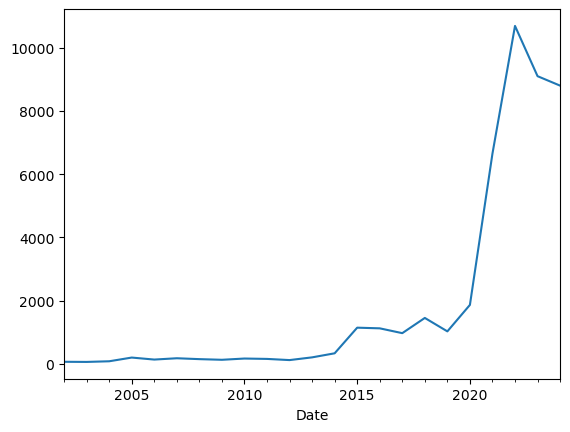

In [74]:
##year end frequency
df_tesla.resample(rule='A').max()['Open'].plot()

<Axes: xlabel='Date'>

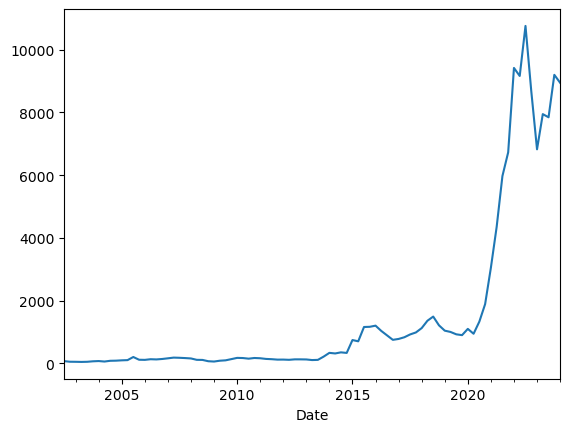

In [75]:
##quaterly start frequency
##https://towardsdatascience.com/resample-function-of-pandas-79b17ec82a78
df_tesla.resample(rule='QS').max()['High'].plot()

In [76]:
##Business End Frequency
##https://towardsdatascience.com/resample-function-of-pandas-79b17ec82a78
df_tesla.resample(rule='BA').max()

Open          High           Low         Close  \
Date                                                                 
2002-12-31     68.275002     70.250000     66.000000     67.224998   
2003-12-31     64.000000     64.650002     62.250000     63.474998   
2004-12-31     84.500000     85.000000     81.050003     83.275002   
2005-12-30    201.800003    201.800003    201.800003    201.800003   
2006-12-29    138.475006    138.500000    135.024994    136.149994   
2007-12-31    180.000000    182.399994    171.500000    180.425003   
2008-12-31    152.000000    155.500000    147.000000    149.475006   
2009-12-31    131.449997    134.250000    128.500000    131.050003   
2010-12-31    171.000000    173.699997    164.350006    168.300003   
2011-12-30    159.000000    162.000000    155.550003    158.274994   
2012-12-31    121.974998    126.849998    120.500000    122.425003   
2013-12-31    208.149994    213.899994    205.250000    208.524994   
2014-12-31    336.424988    349.899994    330.000000    335.575012   
2015-12-31   1147.000000   1164.949951   1135.025024   1141.675049   
2016-12-30   1126.000000   1201.500000   1121.000000   1149.300049   
2017-12-29    973.549988    984.849976    960.700012    977.150024   
2018-12-31   1454.849976   1490.900024   1439.199951   1465.449951   
2019-12-31   1030.000000   1042.000000   1025.000000   1029.699951   
2020-12-31   1867.000000   1888.000000   1839.500000   1855.099976   
2021-12-31   6651.149902   6730.000000   6580.299805   6619.299805   
2022-12-30  10688.000000  10760.000000  10563.000000  10684.900391   
2023-12-29   9099.000000   9200.000000   9001.250000   9087.349609   
2024-12-31   8800.000000   8949.000000   8712.150391   8755.450195   

               Adj Close    Volume  
Date                                
2002-12-31     43.295868   5105978  
2003-12-31     40.880711   4714664  
2004-12-31     55.553391   9605598  
2005-12-30    138.368439   3883330  
2006-12-29     96.969292   1312916  
2007-12-31    128.502991   1106514  
2008-12-31    108.677551    432914  
2009-12-31    102.733894  14593140  
2010-12-31    133.330536   7966656  
2011-12-30    130.526581   2048080  
2012-12-31    106.836578   1504354  
2013-12-31    186.656204  11979226  
2014-12-31    304.972290  14118578  
2015-12-31   1056.006104   9837934  
2016-12-30   1063.058960   4966954  
2017-12-29    920.054504   5856284  
2018-12-31   1390.520508   5190627  
2019-12-31    977.050659   9825204  
2020-12-31   1819.700806   4036332  
2021-12-31   6534.529297   7133891  
2022-12-30  10601.788086   5673542  
2023-12-29   9087.349609    957240  
2024-12-31   8755.450195    400343

In [77]:
df_tesla.resample(rule='BQS').max()

Open         High          Low        Close    Adj Close  \
Date                                                                          
2002-07-01    68.275002    70.250000    66.000000    67.224998    43.295868   
2002-10-01    49.950001    50.875000    48.549999    50.049999    32.234421   
2003-01-01    48.525002    48.849998    48.125000    48.349998    31.139538   
2003-04-01    40.500000    44.900002    40.000000    43.025002    27.710007   
2003-07-01    47.000000    49.150002    45.750000    46.125000    29.706537   
...                 ...          ...          ...          ...          ...   
2023-01-02  6744.000000  6824.899902  6670.000000  6698.850098  6646.743164   
2023-04-03  7920.000000  7947.000000  7825.500000  7858.500000  7797.373047   
2023-07-03  7766.000000  7846.500000  7690.000000  7730.750000  7730.750000   
2023-10-02  9099.000000  9200.000000  9001.250000  9087.349609  9087.349609   
2024-01-01  8800.000000  8949.000000  8712.150391  8755.450195  8755.450195   

             Volume  
Date                 
2002-07-01  5105978  
2002-10-01  1624394  
2003-01-01   739912  
2003-04-01  2356640  
2003-07-01  1800412  
...             ...  
2023-01-02   422749  
2023-04-03   714927  
2023-07-03   505141  
2023-10-02   957240  
2024-01-01   400343  

[87 rows x 6 columns]

<Axes: xlabel='Date'>

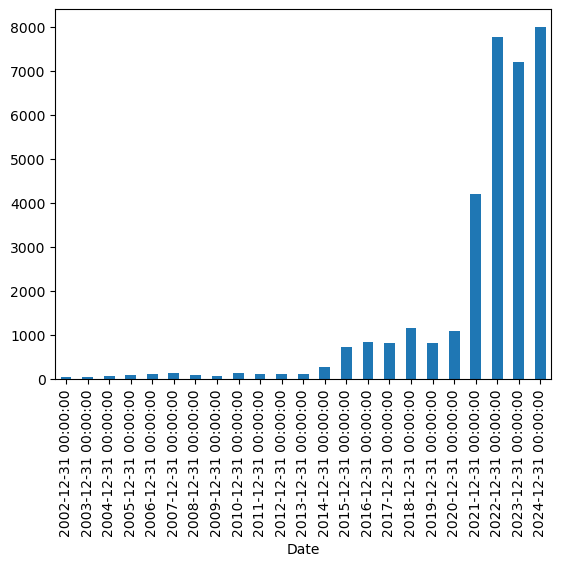

In [78]:
##plotting
df_tesla['Open'].resample(rule='A').mean().plot(kind='bar')

<Axes: xlabel='Date'>

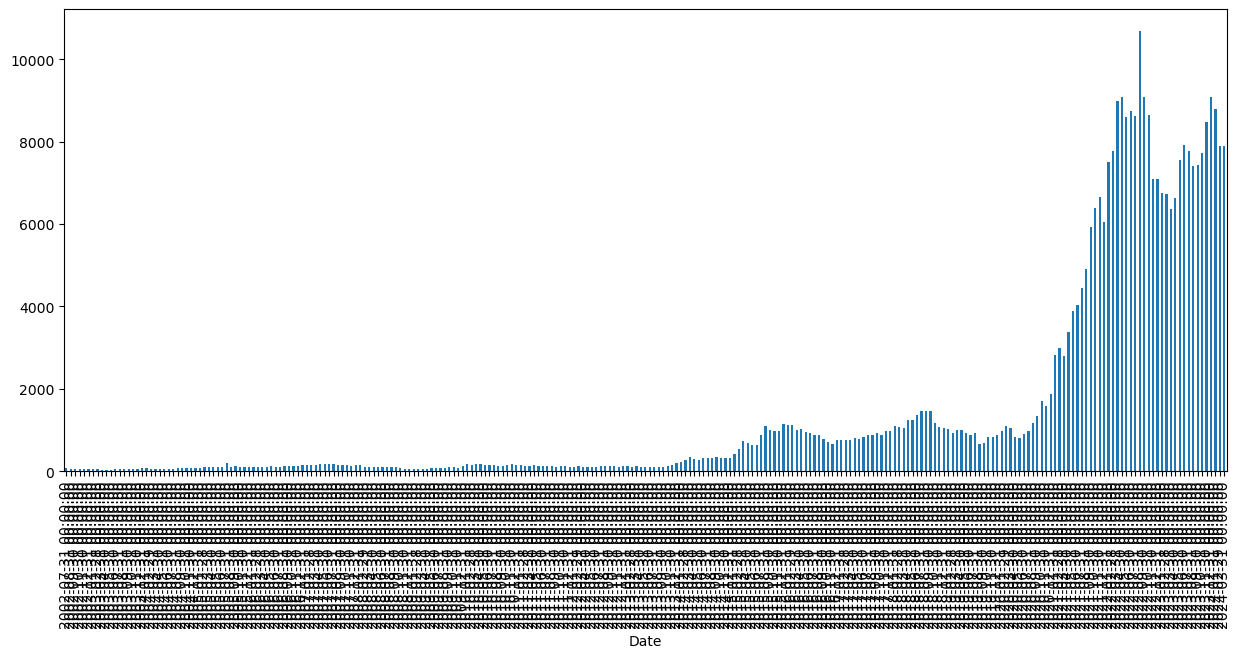

In [79]:
df_tesla['Open'].resample(rule='M').max().plot(kind='bar',figsize=(15,6))

In [80]:
df_tesla['High'].rolling(11).max().head(20)

Date
2002-07-01          NaN
2002-07-02          NaN
2002-07-03          NaN
2002-07-04          NaN
2002-07-05          NaN
2002-07-08          NaN
2002-07-09          NaN
2002-07-10          NaN
2002-07-11          NaN
2002-07-12          NaN
2002-07-15    70.250000
2002-07-16    70.250000
2002-07-17    70.250000
2002-07-18    70.250000
2002-07-19    70.250000
2002-07-22    70.250000
2002-07-23    68.199997
2002-07-24    65.449997
2002-07-25    63.200001
2002-07-26    63.200001
Name: High, dtype: float64

In [81]:
df_tesla.head()

Open       High        Low      Close  Adj Close   Volume
Date                                                                      
2002-07-01  57.974998  58.000000  56.775002  57.400002  36.968140   471000
2002-07-02  57.000000  57.450001  55.750000  56.500000  36.388496   342572
2002-07-03  56.450001  62.325001  56.450001  61.750000  39.769737  3909024
2002-07-04  62.400002  65.224998  60.849998  63.150002  40.671394  4254082
2002-07-05  63.450001  68.000000  62.775002  67.224998  43.295868  5105978

In [82]:
df_tesla['Open:30 days rolling']=df_tesla['Open'].rolling(30).mean()

In [85]:
df_tesla.head()

Open       High        Low      Close  Adj Close   Volume  \
Date                                                                         
2002-07-01  57.974998  58.000000  56.775002  57.400002  36.968140   471000   
2002-07-02  57.000000  57.450001  55.750000  56.500000  36.388496   342572   
2002-07-03  56.450001  62.325001  56.450001  61.750000  39.769737  3909024   
2002-07-04  62.400002  65.224998  60.849998  63.150002  40.671394  4254082   
2002-07-05  63.450001  68.000000  62.775002  67.224998  43.295868  5105978   

            Open:30 days rolling  
Date                              
2002-07-01                   NaN  
2002-07-02                   NaN  
2002-07-03                   NaN  
2002-07-04                   NaN  
2002-07-05                   NaN

<Axes: xlabel='Date'>

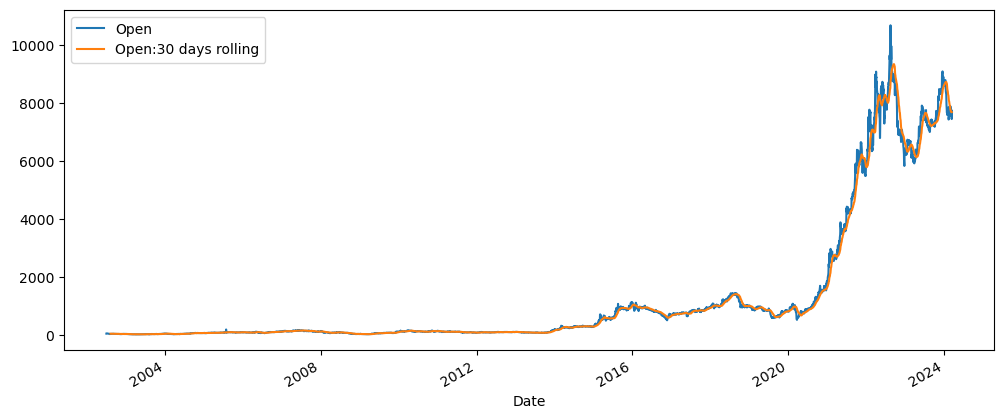

In [84]:
df_tesla[['Open','Open:30 days rolling']].plot(figsize=(12,5))

<Axes: xlabel='Date'>

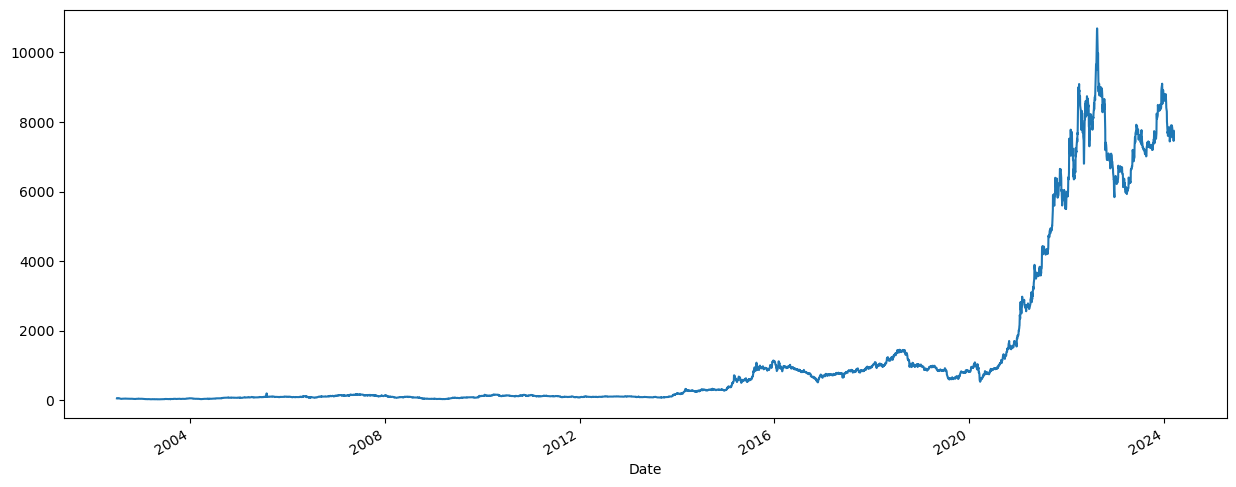

In [89]:
# simple moving average
df_tesla['Open'].plot(figsize=(15,6))

In [90]:
df_tesla['Open:10 days rolling'] = df_tesla['Open'].rolling(window=10,min_periods=1).mean()

<Axes: xlabel='Date'>

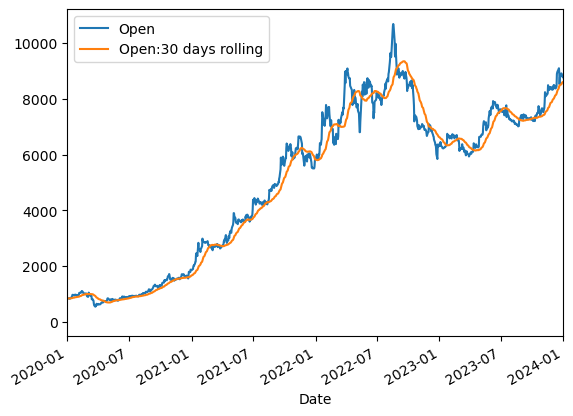

In [95]:
df_tesla[['Open','Open:30 days rolling']].plot(xlim= ['2020-01-01','2024-01-01'])

This graph used in stock market for buying and selling stock for short term

In [96]:
df_tesla['Open:30 days rolling'] = df_tesla['Open'].rolling(window=30,min_periods=1).mean()
df_tesla['Open:50 days rolling'] = df_tesla['Open'].rolling(window=50,min_periods=1).mean()

<Axes: xlabel='Date'>

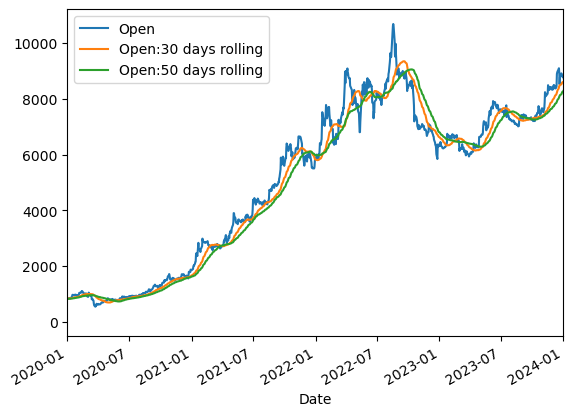

In [98]:
df_tesla[['Open','Open:30 days rolling','Open:50 days rolling']].plot(xlim= ['2020-01-01','2024-01-01'])

# Cumulative moving function

<Axes: xlabel='Date'>

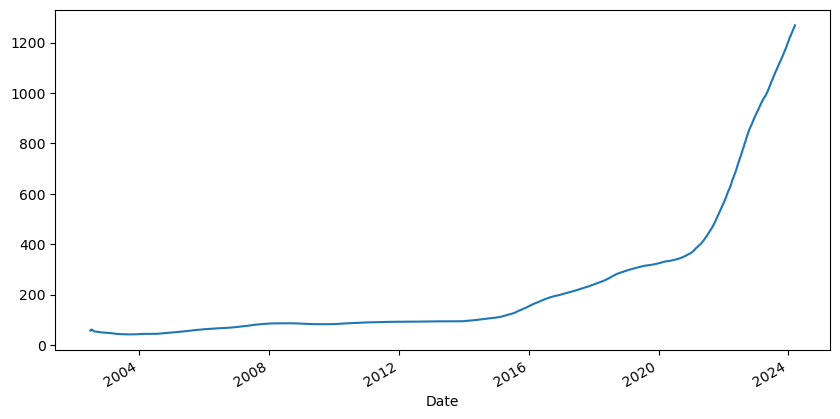

In [99]:
## expanding function

df_tesla['Open'].expanding().mean().plot(figsize=(10,5))

In [100]:
## Exponential Moving Average (EMA)
# smoothing factor == 0.1
df_tesla['EMA_0.1'] = df_tesla['Open'].ewm(alpha=0.1, adjust= False).mean()

<Axes: xlabel='Date'>

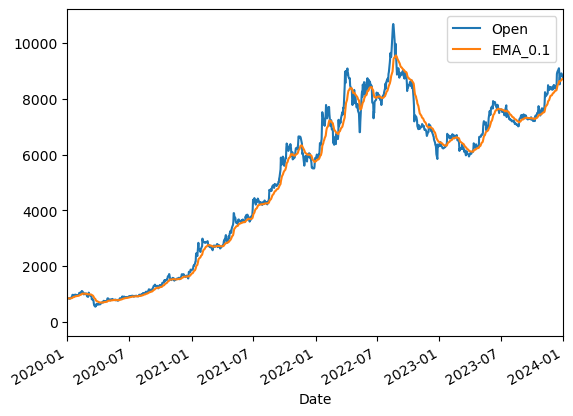

In [102]:
df_tesla[['Open','EMA_0.1']].plot(xlim= ['2020-01-01','2024-01-01'])